In [14]:
from runtest import *
from Data_binary import *
from statistics import median

In [15]:
env = Data(unknown_rate=1)
env.loadfile("hcv.csv") # change this to the test file
env.normalize()
env.alpha = 0
env.cluster_K_means(7)
# this makes it so when we do the ranking, we only check against this number
# of data points; ignore for now
#env.set_validation(2000)
# makes the costs uniform; we won't have groups either
env.set_costs()

# partition into training/test sets
test_env = env.split(0.80)
print("training points:", len(env.data))
print("test points:", len(test_env.data))

training points: 493
test points: 122


In [16]:
costs = [(i+1)/13 for i in range(13)] # list of maximum budgets
results = [] # stores all the results for each value of budget
for c in costs:
    env.max_cost = c
    test_env.max_cost = c
    # take the average of 3 trainings
    r1 = []
    r2 = []
    for i in range(3):
        rtemp = runtest(env,test_env)
        r1.append(rtemp[2])
        r2.append(rtemp[3])
    print("At cost:", c, median(r1), median(r2))
    results.append([r1,r2])

At cost: 0.07692307692307693 853.0716263728578 885.4901174697025
At cost: 0.15384615384615385 527.4533755358774 778.2202288903942
At cost: 0.23076923076923078 466.8361426900121 698.8330724819867
At cost: 0.3076923076923077 437.97181821748984 634.6011807355438
At cost: 0.38461538461538464 391.7404457170875 603.4683408830288
At cost: 0.46153846153846156 375.0438471146115 541.5522190060902
At cost: 0.5384615384615384 385.54842173308754 504.5741092660503
At cost: 0.6153846153846154 264.0262231995554 462.4476336120776
At cost: 0.6923076923076923 254.07919042527533 411.0127964487623
At cost: 0.7692307692307693 241.82507757632436 356.7931905307792
At cost: 0.8461538461538461 212.5433491904986 313.81062550383854
At cost: 0.9230769230769231 208.9195434222451 248.29045956933734
At cost: 1.0 203.21726308670355 203.21726308670355


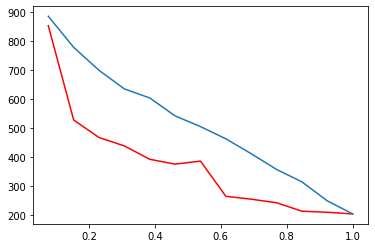

In [17]:
import matplotlib.pyplot as plt

# this value is the total distance between p and 5 closest predicted points to p
resRL = [median(results[i][0]) for i in range(len(results))]
resRAND = [median(results[i][1]) for i in range(len(results))]
plt.plot(costs, resRL, 'r', costs, resRAND)
plt.show()

In [5]:
# we will write the results to BENCHMARK/<test>.csv
f = open('BENCHMARK/hcv_test.csv', 'w')

def write(f,lst):
    for l in lst:
        f.write(str(l))
        f.write(' ')

# first write the number of test points
f.write(str(len(test_env.data)))
f.write('\n')
        
# write the cost
write(f,costs)
f.write('\n')

# write the RL result
write(f,resRL)
f.write('\n')

# finally write the random results
write(f, resRAND)
f.write('\n')

f.close()